<div>
    <h1><center>
        <img src="https://its-live-data.s3.amazonaws.com/documentation/ITS_LIVE_logo.png" width="500"/>
        </center></h1>
    <h1><center>
        Global glacier velocity point data access<br>
        using an ipyLeaflet basemap<br>
        </center></h1>
</div>

***

Author: Mark Fahnestock, Geophysical Institute, University of Alaska Fairbanks
Date: November 8, 2021

***

# Overview

This notebook allows you to select a set of point locations on a Leaflet-based global map, fetch all available ITS_LIVE glacier velocities for the locations, and plot the results.

Select the points by double-clicking on the map - click and drag on the map to pan the field of view.

Once points are chosen, hit "Make Plot" (bottom right corner) to produce a plot.

You can drag individual points after they are placed to relocate them, and then "Make Plot" again

Click "Clear Points" to start over.

The notebook is set up to show data coverage for a small set of "All Satellite" datacubes by default (parts of Greenland/Svalbard/Alaska only for now), but if you select Landsat 8 it will instead use a global collection of Landsat 8 datacubes.

Underling data is stored on AWS S3 as Zarr datacubes and is accessed without an intermediate server. Glacier velocities in the "All Satellite" datacube collection are derived from all available Landsat 8, Sentinel-1A/B, Sentinel-2A/B imagery, while they are limited to Landsat 8 for now in the global dataset.


Please refer to the <a href="https://its-live.jpl.nasa.gov/">project website</a> for further product infomation and for appraopriate data citation.

### Setting up a local environment

From the repository root, run in a terminal:
```shell
cd notebooks
conda env create -f environment.yml
```
activate newly created environment:
```shell
conda activate itslive-notebooks
```

then start jupyter in browser
```shell
jupyter notebook
```

In [6]:
%matplotlib widget
# import the library
from velocity_widget import ITSLIVE

velocity_widget = ITSLIVE()

Map(center=[64.2, -49.43], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_o…

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
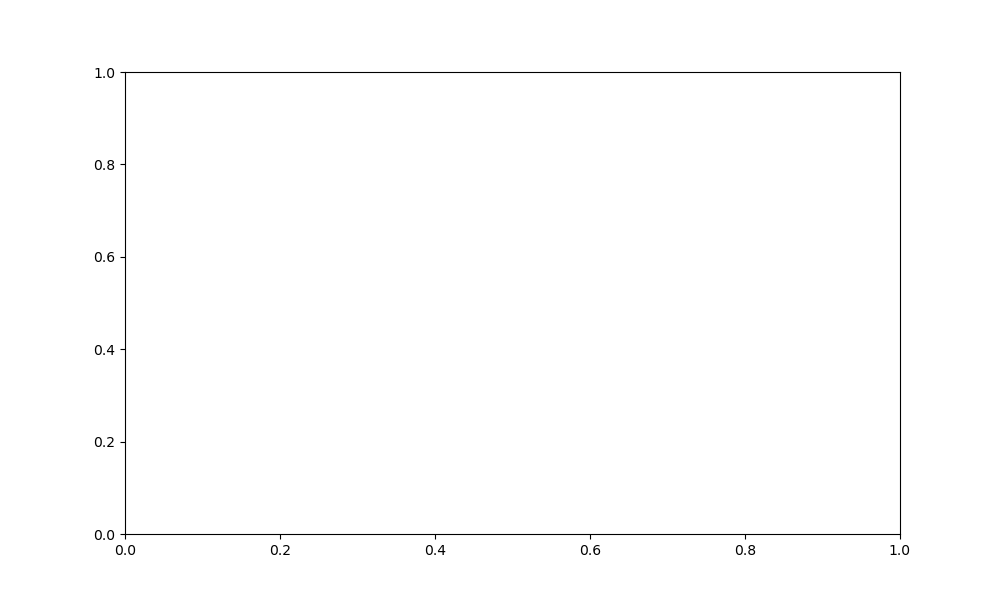

In [8]:
# If this congiguration changes we need to rerun the cell.
config = { 
    "plot": "v", # or other ITS_LIVE variables: vx, vy ...
    "max_separation_days": 90,
    "color_by": "points" # valid values: satellite, points
}

velocity_widget.set_config(config)
velocity_widget.display()

## Gathering and processing the data

## Zarr and S3 cloud storage

* Why Zarr? 
* Chunking of ITS_LIVE cubes

### Working with ITS_LIVE zarr cubes in **xarray**

In [ ]:
# we can work directly with the xarray instances for the cubes that match our points in the map.
# this will return a list of tuples with the file to the cube and the actual xarray instance!
zarr_cubes = velocity_widget.get_zarr_cubes()
cube_tuple = zarr_cubes[0]
print(f"Zarr file: {cube_tuple[0]}")
# The actual xarray is the second item in our tuple, if we pretty printed it will fetch metadata from
# S3 and will take ~10 seconds to load the first time. Chunking was optimized for time series so any spatial operation will 
# take some time, where as selecting a point and getting all the values along the time dimenssion will be fast.
cube = cube_tuple[1]
cube